Machine Learning Phase Transitions

Aditya N. Singh, Anthony Cui & Arun Yethiraj

# Importing Libraries and Data Preparation

In [38]:
#Standard Libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Ellipse
from matplotlib.colors import ListedColormap

#Dimensional Reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

#For Autoencoders and Neural Nets
from keras.layers import Input, Dense
from keras.models import Model

#SVM library
from sklearn import svm

#Clustering libraries
from sklearn.mixture import GaussianMixture as GMM
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering as SC

In [9]:
#Loading data
x            = np.load('x.npy')
y            = np.load('Y.npy')
N            = int(np.sqrt(x.shape[1]))
T            = np.load('T.npy')
dataset_size = x.shape[0]

#Critical point for (infinitely large) 2D Ising Model
iTc          = 0.44068679 

#Index at which the critical point takes place
loc = 237

#Size and coloring scheme for plots
sz           = 12
color = np.zeros((dataset_size,3))
color[:loc,2]=  1
color[loc:,0]=  1

In [3]:
#Geting the configurations for T << Tc and T >> Tc
#for training (supervised methods)
x_train = np.append(x[:150,:],x[350:,:],axis=0)
y_train = np.append(y[:150],y[350:])
T_train = np.append(T[:150],T[350:])
x_test  = x[150:350]
y_test  = y[150:350]
T_test  = T[150:350]

# Unsupervised Methods

## PCA and tSNE

In [7]:
#PCA on raw data with 2,5 and 10 components
pca         = np.transpose(PCA(n_components = 2).fit_transform(x))
pca_5       = np.transpose(PCA(n_components = 5).fit_transform(x))
pca_10      = np.transpose(PCA(n_components = 10).fit_transform(x))
#TSNE on raw data
tsne        = np.transpose(TSNE(n_components = 2).fit_transform(x))
#TSNE on 5 axes of PCA
tsne_pca_5  = np.transpose(TSNE(n_components = 2).fit_transform(np.transpose(pca_5)))
#TSNE on 10 axes of PCA
tsne_pca_10 = np.transpose(TSNE(n_components = 2).fit_transform(np.transpose(pca_10)))

Text(0.5, 1.0, 'tSNE (10 PCA components)')

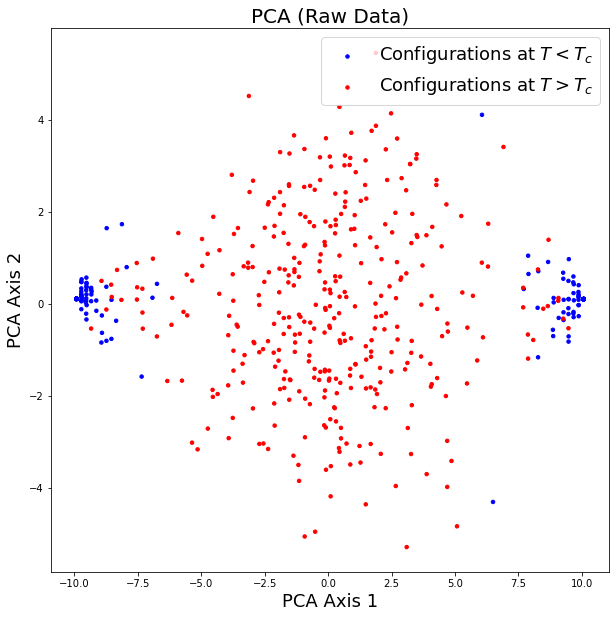

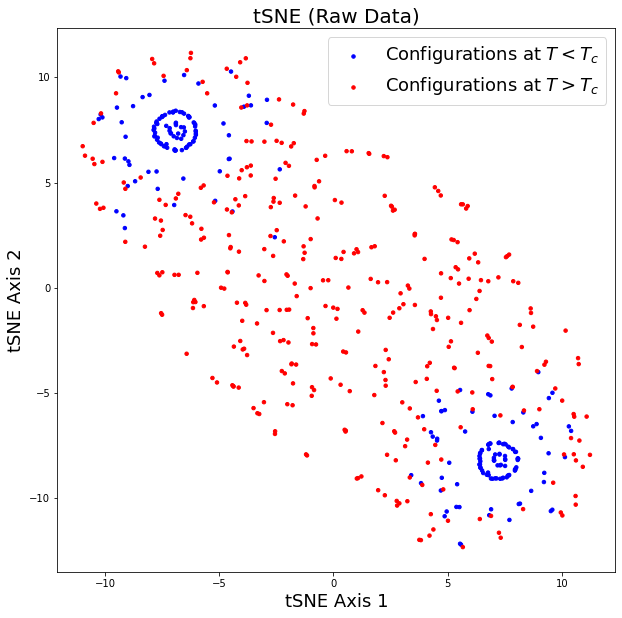

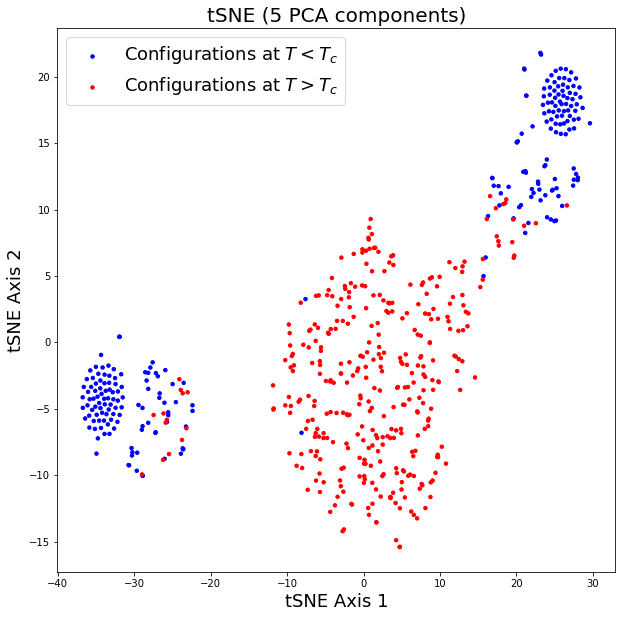

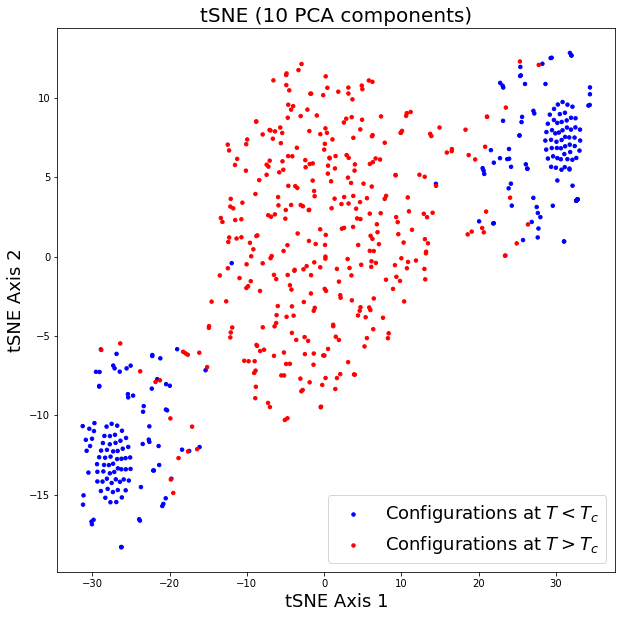

In [10]:
#Plots
fig = plt.figure(figsize=(10,10))
plt.scatter(pca[0], pca[1], s=sz,c=color)
plt.scatter(pca[0,0],pca[1,0],s=sz,c=[color[0]],label='Configurations at $T<T_c$')
plt.scatter(pca[0,-1],pca[1,-1],s=sz,c=[color[-1]],label='Configurations at $T>T_c$')
plt.xlabel("PCA Axis 1",fontsize=18)
plt.ylabel("PCA Axis 2",fontsize=18)
plt.legend(fontsize=18)
plt.title('PCA (Raw Data)',fontsize=20)


fig = plt.figure(figsize=(10,10))
plt.scatter(tsne[0], tsne[1], s=sz,c=color)
plt.scatter(tsne[0,0],tsne[1,0],s=sz,c=[color[0]],label='Configurations at $T<T_c$')
plt.scatter(tsne[0,-1],tsne[1,-1],s=sz,c=[color[-1]],label='Configurations at $T>T_c$')
plt.xlabel("tSNE Axis 1",fontsize=18)
plt.ylabel("tSNE Axis 2",fontsize=18)
plt.legend(fontsize=18)
plt.title('tSNE (Raw Data)',fontsize=20)


fig = plt.figure(figsize=(10,10))
plt.scatter(tsne_pca_5[0], tsne_pca_5[1], s=sz,c=color)
plt.scatter(tsne_pca_5[0,0],tsne_pca_5[1,0],s=sz,c=[color[0]],label='Configurations at $T<T_c$')
plt.scatter(tsne_pca_5[0,-1],tsne_pca_5[1,-1],s=sz,c=[color[-1]],label='Configurations at $T>T_c$')
plt.xlabel("tSNE Axis 1",fontsize=18)
plt.ylabel("tSNE Axis 2",fontsize=18)
plt.legend(fontsize=18)
plt.title('tSNE (5 PCA components)',fontsize=20)


fig = plt.figure(figsize=(10,10))
plt.scatter(tsne_pca_10[0], tsne_pca_10[1], s=sz,c=color)
plt.scatter(tsne_pca_10[0,0],tsne_pca_10[1,0],s=sz,c=[color[0]],label='Configurations at $T<T_c$')
plt.scatter(tsne_pca_10[0,-1],tsne_pca_10[1,-1],s=sz,c=[color[-1]],label='Configurations at $T>T_c$')
plt.xlabel("tSNE Axis 1",fontsize=18)
plt.ylabel("tSNE Axis 2",fontsize=18)
plt.legend(fontsize=18)
plt.title('tSNE (10 PCA components)',fontsize=20)

## Autoencoders

In [55]:
#constructing the autoencoder in keras
#3 encoder layers are used and only 1
#decoder layer is used

encoding_dim = 2  
IL  = Input(shape=(N*N,))
EL1 = Dense(80, activation='relu')(IL)
EL2 = Dense(40, activation='relu')(EL1)
EL3 = Dense(2, activation='relu')(EL2)
DL  = Dense(N*N, activation='linear')(EL3)

autoencoder = Model(IL, DL)
autoencoder.compile(optimizer='adam', loss='mse')
print(autoencoder.summary())

history = autoencoder.fit(x, x,
                epochs=1000,
                batch_size=50,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_18 (Dense)             (None, 40)                3240      
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 82        
_________________________________________________________________
dense_20 (Dense)             (None, 100)               300       
Total params: 11,702
Trainable params: 11,702
Non-trainable params: 0
_________________________________________________________________
None


Text(0.5, 1.0, 'tSNE (2 Autoencoders axes)')

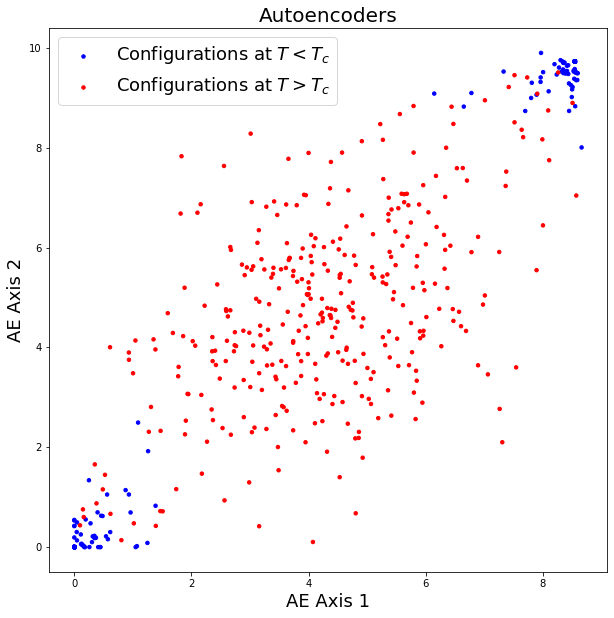

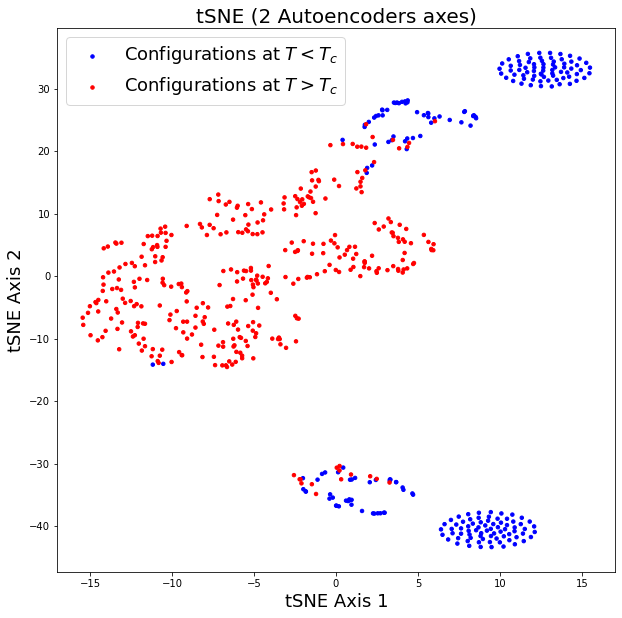

In [56]:
encoder = Model(IL, EL3)
ae      = np.transpose(encoder.predict(x))
tsne_ae = np.transpose(TSNE(n_components = 2).fit_transform(np.transpose(ae)))

fig = plt.figure(figsize=(10,10))
plt.scatter(ae[0], ae[1], s=sz,c=color)
plt.scatter(ae[0,0],ae[1,0],s=sz,c=[color[0]],label='Configurations at $T<T_c$')
plt.scatter(ae[0,-1],ae[1,-1],s=sz,c=[color[-1]],label='Configurations at $T>T_c$')
plt.xlabel("AE Axis 1",fontsize=18)
plt.ylabel("AE Axis 2",fontsize=18)
plt.legend(fontsize=18)
fig.savefig('ising_ae.pdf',dpi=400,format='pdf')
plt.title('Autoencoders',fontsize=20)

fig = plt.figure(figsize=(10,10))
plt.scatter(tsne_ae[0], tsne_ae[1], s=sz,c=color)
plt.scatter(tsne_ae[0,0],tsne_ae[1,0],s=sz,c=[color[0]],label='Configurations at $T<T_c$')
plt.scatter(tsne_ae[0,-1],tsne_ae[1,-1],s=sz,c=[color[-1]],label='Configurations at $T>T_c$')
plt.xlabel("tSNE Axis 1",fontsize=18)
plt.ylabel("tSNE Axis 2",fontsize=18)
plt.legend(fontsize=18)
fig.savefig('ising_tsne_ae.pdf',dpi=400,format='pdf')
plt.title('tSNE (2 Autoencoders axes)',fontsize=20)

## Gaussian Mixture Model Clustering

In [79]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(2, 3):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def gaussian_mixture_method_clustering(x,T,n_clusters=3,mean=60, title='None'):
    gmm = GMM(n_components=n_clusters,tol=0.0001,max_iter=10000000,verbose=0).fit(np.transpose(x))
    u = gmm.means_
    cov = gmm.covariances_
    labels = gmm.predict(np.transpose(x))
    prob = gmm.predict_proba(np.transpose(x))
    f = plt.figure(figsize=(10,10))
    p = np.zeros((dataset_size))
    for i in range(dataset_size):
        m = 30
        for j in range(n_clusters):
            if labels[i] != j and abs(prob[i][labels[i]]-prob[i][j]) < m:
                p[i] = abs(prob[i][labels[i]]-prob[i][j])
    idx = np.argsort(p)
    Tcs = T[idx]
    Tcs = Tcs[:mean]
    #The predicted critical temperature
    #is the mean of the data outside
    #the clusters
    Tc = np.mean(Tcs)
    print(Tc)
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=0.2*w_factor)
    labels[idx[:mean]] = 4
    colors = ListedColormap(['orange','g','b','firebrick'])
    sc = plt.scatter(x[0,:], x[1,:], c=labels,s=12,cmap=colors)
    plt.legend(handles=sc.legend_elements()[0], labels=["Cluster 1", "Cluster 2", "Cluster 3", "Outliers"], fontsize=18)

    plt.xlabel("tSNE Axis 1",fontsize=18)
    plt.ylabel("tSNE Axis 2",fontsize=18)
    plt.title(title,fontsize=20)

2.808472454090151
2.362228714524208
2.3091402337228715


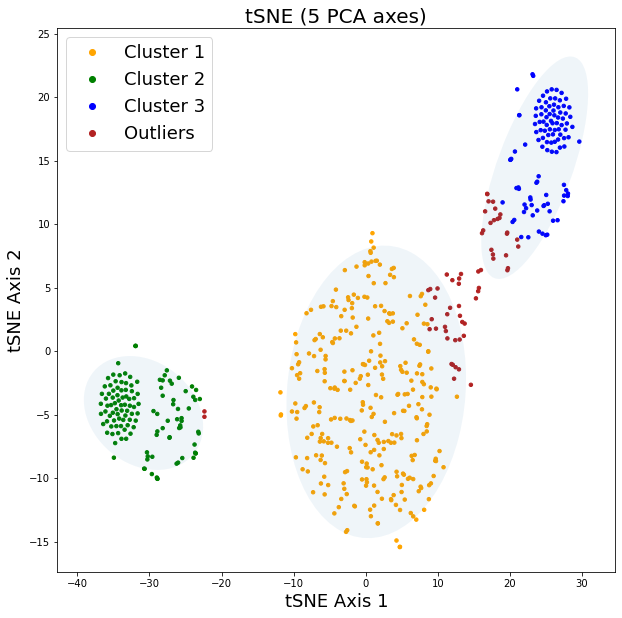

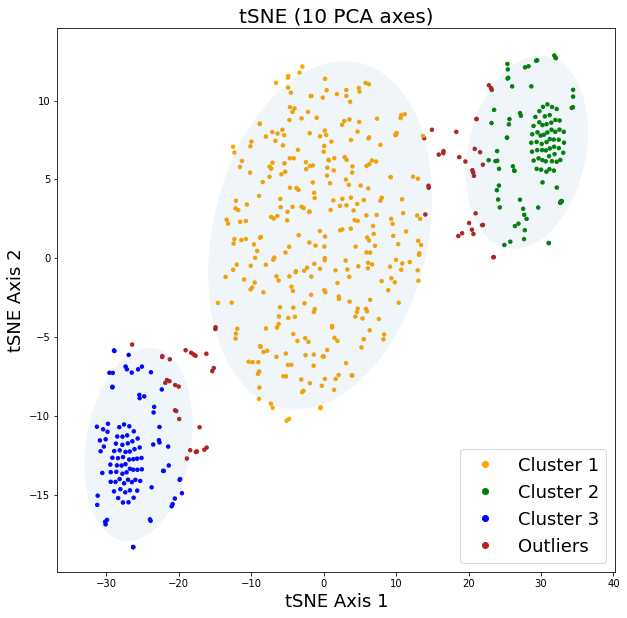

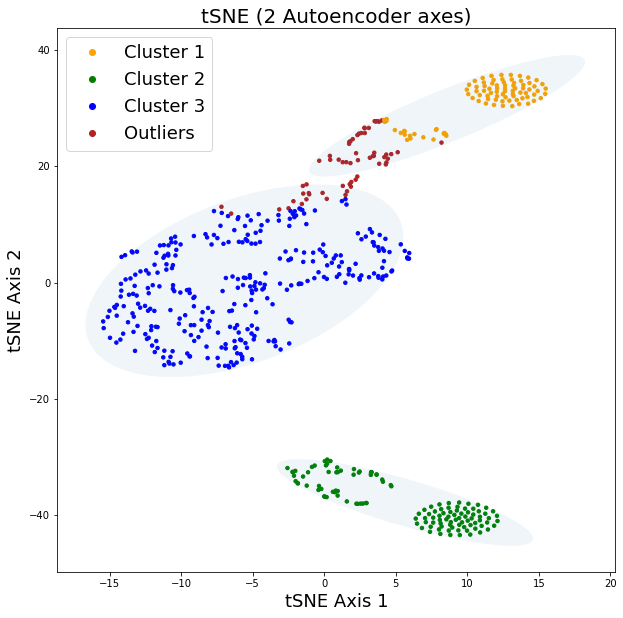

In [78]:
#Clustering data for all the unsupervised methods used
gaussian_mixture_method_clustering(tsne_pca_5,T,title='tSNE (5 PCA axes)')
gaussian_mixture_method_clustering(tsne_pca_10,T,title='tSNE (10 PCA axes)')
gaussian_mixture_method_clustering(tsne_ae,T,title='tSNE (2 Autoencoder axes)',save=True)
#Note: GMM with 3 components is not the best method for clustering the autoencoder axes
#A work around would be to run GMM with 5 clusters and then chose two clusters with the 
#lowest number of points

# Supervised Methods

## Support Vector Machines

In [79]:
#Defining the SVM model with RBF kernel with gamma=0.03
clf = svm.SVC(gamma=0.03, max_iter=-1,probability=True)
clf.fit(x_train, y_train)


#Computing difference in probability prediction (uncertainty)
prob_SVM      = clf.predict_proba(x_test)
prob_diff_SVM = np.abs(prob_SVM[:,0] - prob_SVM[:,1]).reshape(-1)
base          = 1/np.log(2)
entropy_SVM   = -base*(prob_SVM[:,0]*np.log(prob_SVM[:,0]) + 
                       prob_SVM[:,1]*np.log(prob_SVM[:,1])).reshape(-1)

#Computing Training error
test = clf.predict(x_test)
err = 0
for i in range(T_test.shape[0]):
    if y_test[i] != test[i]:
        err = err+1



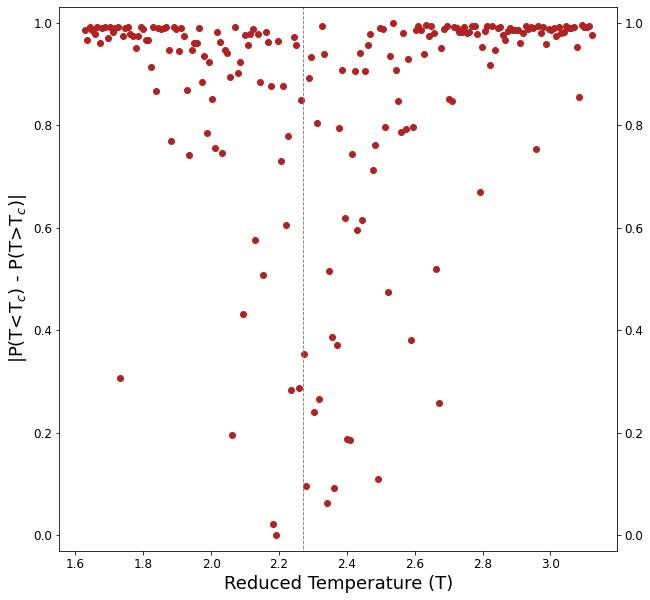

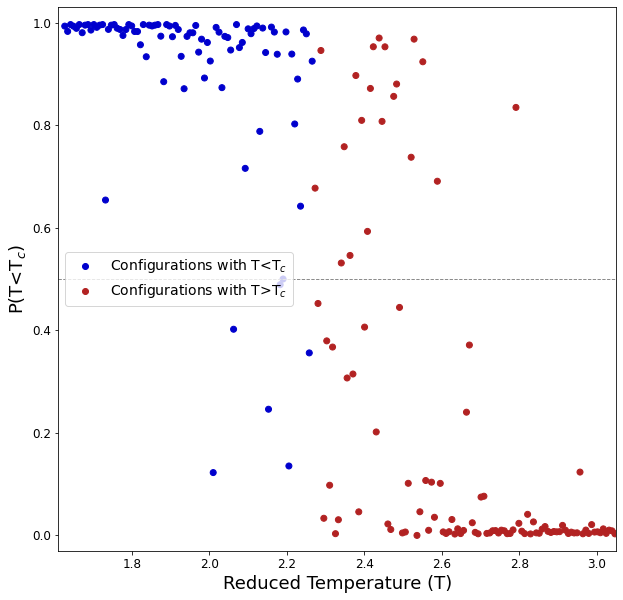

In [80]:
#Prediction of test data
fig = plt.figure(figsize=(10,10))
plt.plot(T_test, prob_diff_SVM, linestyle='None',marker='o',markersize=6,color='firebrick')
temp = np.arange(-.2,1.2,0.1)
crit = np.zeros((14))
crit[:] = 2.269185
plt.plot(crit,temp, linestyle='dashed', linewidth=0.9, color='gray')
plt.ylim(-0.03,1.03)
plt.xlabel("Reduced Temperature (T)", fontsize=18)
plt.ylabel("|P(T<T$_c$) - P(T>T$_c$)|", fontsize=18)
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on', right='on')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


fig = plt.figure(figsize=(10,10))
colors = ListedColormap(['mediumblue','firebrick'])
sc = plt.scatter(T_test, prob_SVM[:,0],c=y_test,cmap=colors)
plt.legend(handles=sc.legend_elements()[0], labels=["Configurations with T<T$_c$", "Configurations with T>T$_c$"], fontsize=14,loc='center left')
plt.xlabel("Reduced Temperature (T)", fontsize=18)
plt.ylabel("P(T<T$_c$)", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.ylim(-0.03,1.03)
plt.xlim(1.61,3.05)
plt.plot([1.61,3.05],[0.5,0.5], linestyle='dashed', linewidth=0.9, color='gray')




## Artificial Neural Network

In [81]:
#Constructing a 3 layer ANN in keras

IL  = Input(shape=(N*N,))
L1  = Dense(20, activation='relu')(IL)
L2  = Dense(20, activation='relu')(L1)
L3  = Dense(20, activation='relu')(L2)
OL  = Dense(1, activation='sigmoid')(L3)

NN = Model(IL, OL)
NN.compile(optimizer='adam', loss='mse')
print(NN.summary())

#Fitting the data
history = NN.fit(x_train, y_train,
                epochs=1200,
                batch_size=30,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 100)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 20)                2020      
_________________________________________________________________
dense_42 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_43 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 21        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________
None


In [82]:
#Computing difference in probability prediction (uncertainty)
prob_NN      = 1-NN.predict(x_test)
prob_diff_NN = np.abs(2*prob_NN - 1).reshape(-1)
entropy_NN   = -base*(prob_NN*np.log(prob_NN) + 
                       (1-prob_NN)*np.log(prob_NN-1)).reshape(-1)

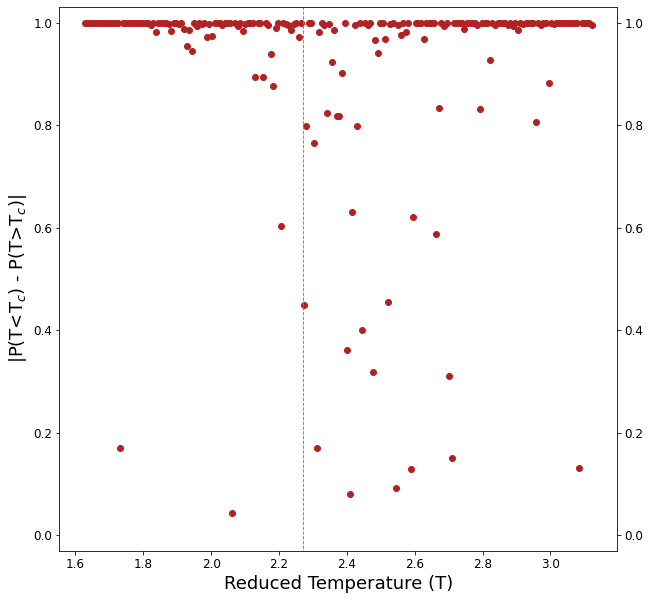

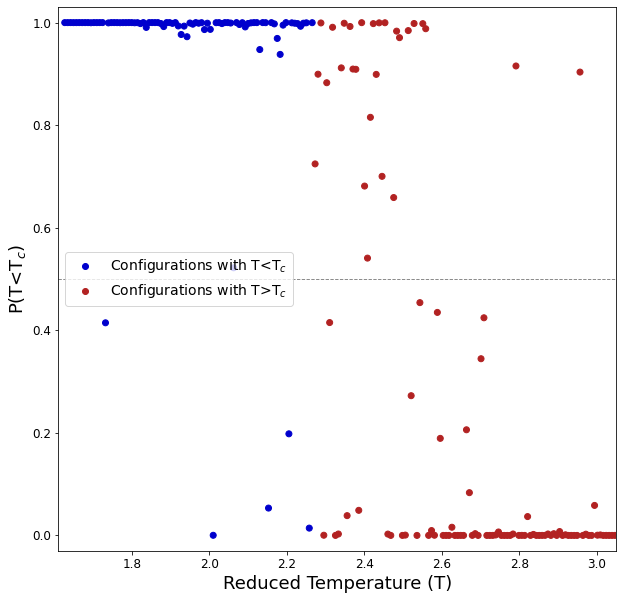

In [83]:
#Plots
fig = plt.figure(figsize=(10,10))
plt.plot(T_test, prob_diff_NN, linestyle='None',marker='o',markersize=6,color='firebrick')
temp = np.arange(-.2,1.2,0.1)
crit = np.zeros((14))
crit[:] = 2.269185
plt.plot(crit,temp, linestyle='dashed', linewidth=0.9, color='gray')
plt.ylim(-0.03,1.03)
plt.xlabel("Reduced Temperature (T)", fontsize=18)
plt.ylabel("|P(T<T$_c$) - P(T>T$_c$)|", fontsize=18)
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on', right='on')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


fig = plt.figure(figsize=(10,10))
colors = ListedColormap(['mediumblue','firebrick'])
sc = plt.scatter(T_test, prob_NN,c=y_test,cmap=colors)
plt.legend(handles=sc.legend_elements()[0], labels=["Configurations with T<T$_c$", "Configurations with T>T$_c$"], fontsize=14,loc='center left')
plt.xlabel("Reduced Temperature (T)", fontsize=18)
plt.ylabel("P(T<T$_c$)", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-0.03,1.03)
plt.xlim(1.61,3.05)
plt.plot([1.61,3.05],[0.5,0.5], linestyle='dashed', linewidth=0.9, color='gray')